In [27]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Analyst course\\CAPSTONE PROJECT\\CAPSTONE 1\\Customer-Churn-Records.csv")

# Count and percentage of missing values per column
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_pct
}).sort_values(by='Percentage (%)', ascending=False)

missing_summary

# The output shows all zeros, meaning there are no missing values.
# Since the dataset is complete, no imputation or column dropping is required.
# You can explicitly state: “The dataset has no missing values, so we can proceed directly to analysis without additional cleaning.”

,Missing Values,Percentage (%)
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


In [28]:
df = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Analyst course\\CAPSTONE PROJECT\\CAPSTONE 1\\Customer-Churn-Records.csv")

# Check the number of rows and columns
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")

# df.shape returns a tuple (rows, columns).
# rows → number of customer records.
# cols → number of features (variables).
# Printing this gives a quick overview of dataset size.

The dataset has 10000 rows and 18 columns.


In [29]:
df = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Analyst course\\CAPSTONE PROJECT\\CAPSTONE 1\\Customer-Churn-Records.csv")

# Count churned vs non-churned customers
churn_counts = df['Exited'].value_counts()
print(churn_counts)

# Percentage distribution
churn_pct = df['Exited'].value_counts(normalize=True) * 100
print(churn_pct)

# churn_counts:
# This prints the number of customers in each group:
# 0 → retained customers (did not churn)
# 1 → churned customers (left the bank)

Exited
0    7962
1    2038
Name: count, dtype: int64
Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\3190230056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')


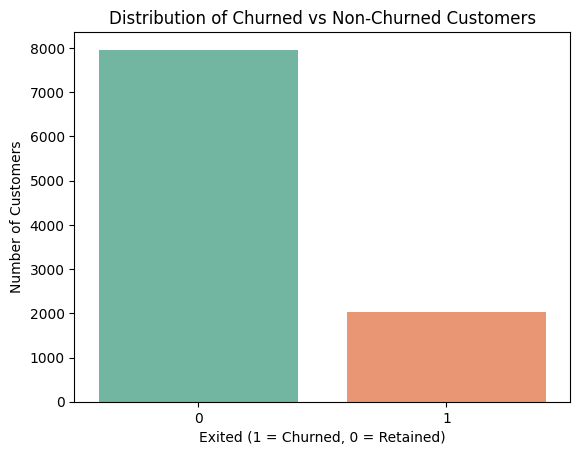

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exited', data=df, palette='Set2')
plt.title("Distribution of Churned vs Non-Churned Customers")
plt.xlabel("Exited (1 = Churned, 0 = Retained)")
plt.ylabel("Number of Customers")
plt.show()

# The bar chart visualizes the imbalance between churned and retained customers.
# If one bar is much taller, it confirms class imbalance.
# This is important because imbalanced data can bias churn prediction models.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\3438256231.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited']==0]['EstimatedSalary'], label='Retained', shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\3438256231.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited']==1]['EstimatedSalary'], label='Churned', shade=True)


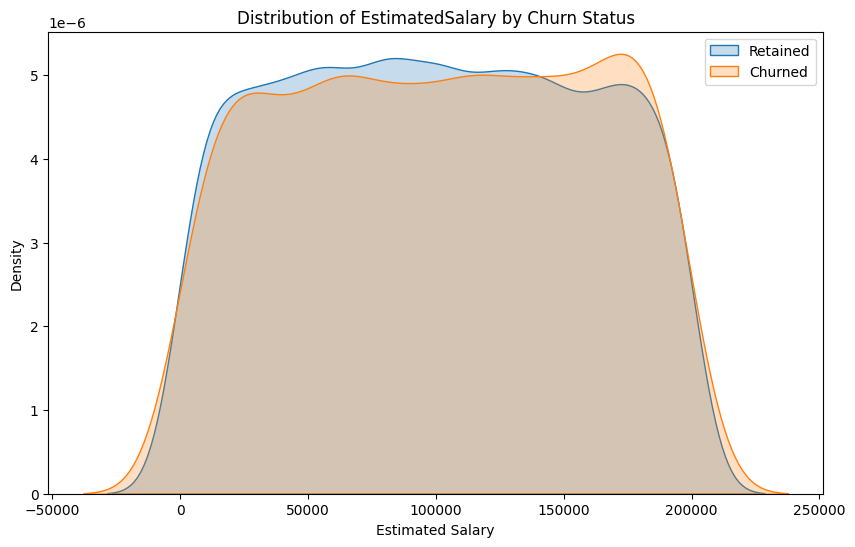

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Exited']==0]['EstimatedSalary'], label='Retained', shade=True)
sns.kdeplot(df[df['Exited']==1]['EstimatedSalary'], label='Churned', shade=True)
plt.title("Distribution of EstimatedSalary by Churn Status")
plt.xlabel("Estimated Salary")
plt.ylabel("Density")
plt.legend()
plt.show()

# This plot shows the probability distribution of salaries for churned vs retained customers.
# If the two curves overlap heavily, it means salary is not a strong differentiator of churn.
# In most churn datasets, the distributions look very similar, suggesting salary has little impact.


Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\1688377483.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')


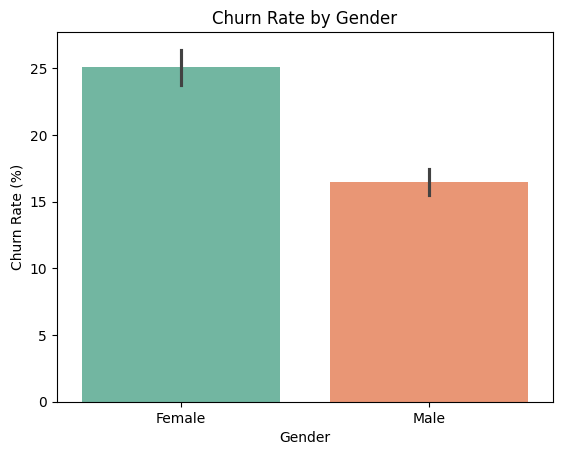

In [33]:
# Churn rate by Gender
gender_churn = df.groupby('Gender')['Exited'].mean() * 100
print(gender_churn)

sns.barplot(x='Gender', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate (%)")
plt.show()

# Groups customers by Gender and calculates churn percentage.
# The bar chart shows whether males or females churn more.
# In many churn datasets, female customers churn slightly more than males, but this depends on the dataset.


Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\1953403182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Geography', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')


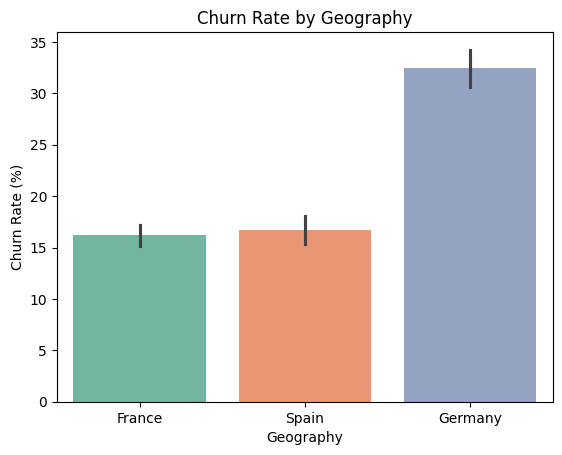

In [35]:
# Churn rate by Geography
geo_churn = df.groupby('Geography')['Exited'].mean() * 100
print(geo_churn)

sns.barplot(x='Geography', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate (%)")
plt.show()

# Groups customers by Geography (e.g., France, Spain, Germany).
# The bar chart shows churn differences across regions.
# Typically, Germany has higher churn rates, while France and Spain have lower.


IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\490379162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsActiveMember', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')


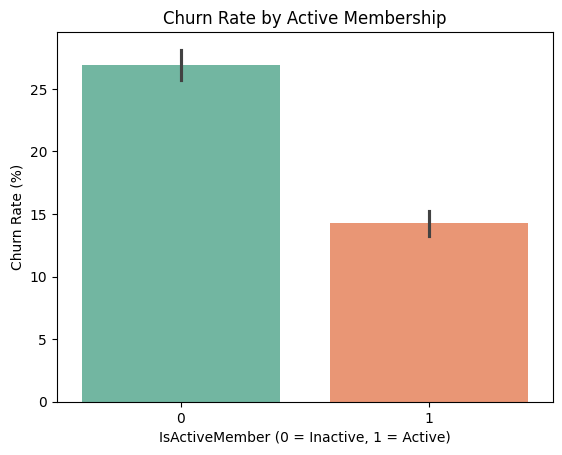

In [37]:
# Churn rate by IsActiveMember
active_churn = df.groupby('IsActiveMember')['Exited'].mean() * 100
print(active_churn)

sns.barplot(x='IsActiveMember', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')
plt.title("Churn Rate by Active Membership")
plt.ylabel("Churn Rate (%)")
plt.xlabel("IsActiveMember (0 = Inactive, 1 = Active)")
plt.show()

# Groups customers by activity status.
# Inactive members (IsActiveMember = 0) usually churn at much higher rates than active ones.
# This is often one of the strongest predictors of churn.


In [38]:
# Calculate average CreditScore, Balance, and EstimatedSalary by churn status
avg_values = df.groupby('Exited')[['CreditScore', 'Balance', 'EstimatedSalary']].mean()

print(avg_values)

# groupby('Exited') splits the dataset into churned (1) and retained (0) groups.
# .mean() calculates the average for each numeric feature.
# The output table shows the average CreditScore, Balance, and EstimatedSalary for both groups.


        CreditScore       Balance  EstimatedSalary
Exited                                            
0        651.837855  72742.750663     99726.853141
1        645.414622  91109.476006    101509.908783


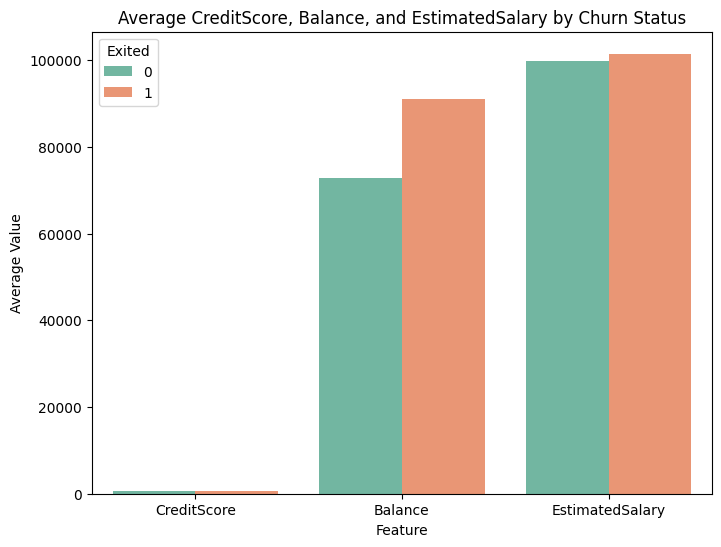

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_values_plot = avg_values.reset_index().melt(id_vars='Exited', var_name='Feature', value_name='Average')

plt.figure(figsize=(8,6))
sns.barplot(x='Feature', y='Average', hue='Exited', data=avg_values_plot, palette='Set2')
plt.title("Average CreditScore, Balance, and EstimatedSalary by Churn Status")
plt.ylabel("Average Value")
plt.xlabel("Feature")
plt.show()

# Converts the grouped averages into a tidy format for plotting.
# Bar chart compares churned vs retained customers across the three features.
# Makes it easy to visually spot differences (e.g., higher balances among churned customers).


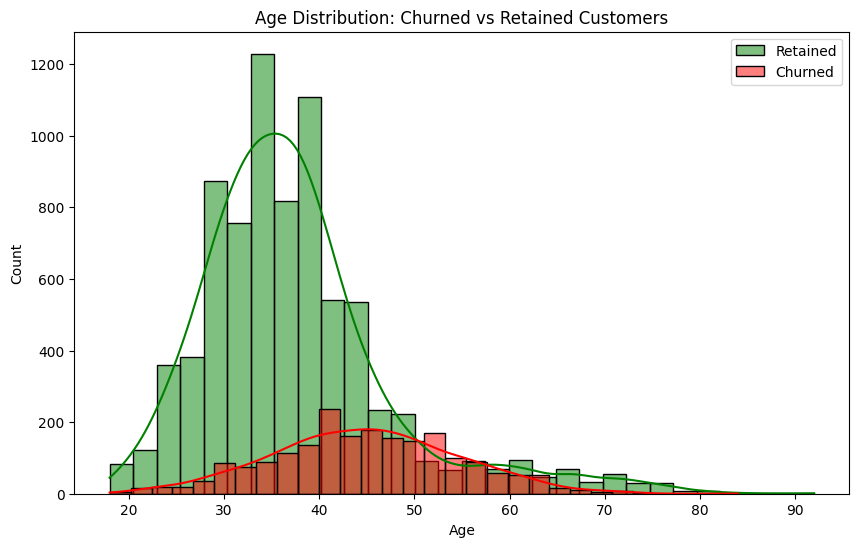

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df[df['Exited']==0]['Age'], bins=30, color='green', label='Retained', kde=True)
sns.histplot(df[df['Exited']==1]['Age'], bins=30, color='red', label='Churned', kde=True)
plt.title("Age Distribution: Churned vs Retained Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

# Two histograms show the frequency distribution of ages for churned vs retained customers.
# The KDE curve smooths the distribution.
# If churned customers cluster more in certain age ranges (e.g., mid‑30s to 40s), it suggests age influences churn.
# Retained customers may show a different distribution (e.g., younger or older groups staying longer).


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\1952983435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df, palette='Set2')


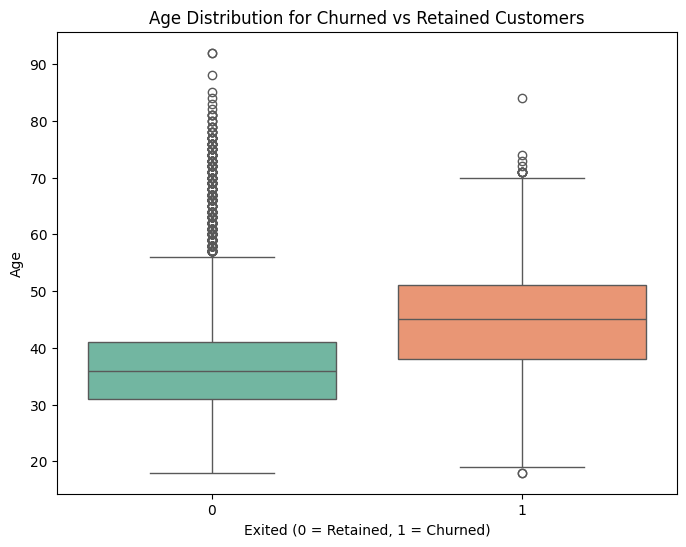

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Exited', y='Age', data=df, palette='Set2')
plt.title("Age Distribution for Churned vs Retained Customers")
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("Age")
plt.show()

# The boxplot compares median, quartiles, and outliers of age for churned vs retained groups.
# If churned customers have a higher median age, it suggests older customers churn more.
# If distributions overlap heavily, age may not be a strong predictor.


In [23]:
# Select numeric features of interest
num_features = ['CreditScore', 'Balance', 'EstimatedSalary']

# Compute correlation matrix
corr_matrix = df[num_features].corr()

print(corr_matrix)

# .corr() calculates Pearson correlation coefficients between the selected numeric features.
# Values range from -1 to +1:
# +1 → perfect positive correlation
# -1 → perfect negative correlation
# 0 → no linear correlation
# This table shows whether CreditScore, Balance, and EstimatedSalary are related.


                 CreditScore   Balance  EstimatedSalary
CreditScore         1.000000  0.006268        -0.001384
Balance             0.006268  1.000000         0.012797
EstimatedSalary    -0.001384  0.012797         1.000000


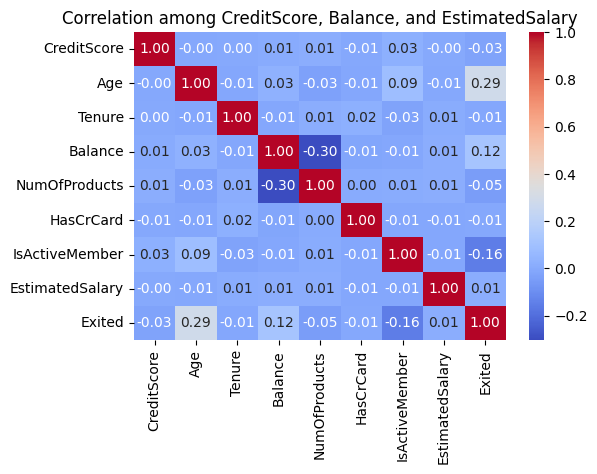

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation among CreditScore, Balance, and EstimatedSalary")
plt.show()

# The heatmap provides a visual representation of correlations.
# Darker colors indicate stronger correlations.
# If correlations are close to zero, these features are largely independent.


In [19]:
# Select numeric features plus churn column
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Compute correlation matrix
corr_matrix = df[num_features].corr()

corr_matrix

# We include Exited (churn indicator) along with numeric features.
# .corr() computes Pearson correlation coefficients.
# This table shows how strongly each feature is linearly related to churn.
# Values close to +1 or -1 indicate strong relationships; values near 0 mean weak or no linear relationship.


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000


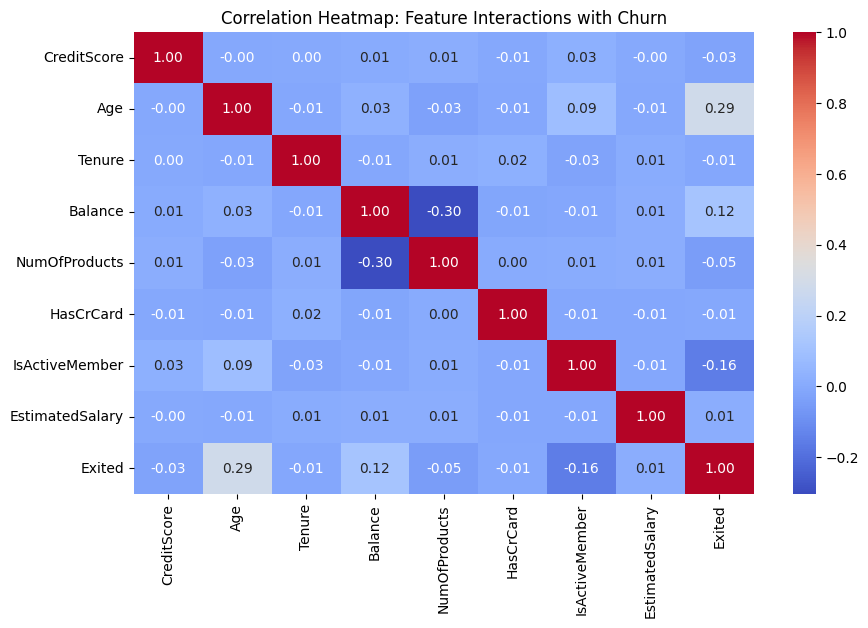

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Feature Interactions with Churn")
plt.show()

# The heatmap provides a visual summary of correlations.
# Darker red/blue colors indicate stronger positive/negative correlations.
# Look specifically at the Exited row/column:
# Features with higher absolute correlation values (e.g., IsActiveMember, Age) are more predictive of churn.
# Features with near‑zero correlation (e.g., EstimatedSalary) have little direct impact.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\4259829965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\4259829965.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=df, palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\4259829965.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df, palette='Set2')


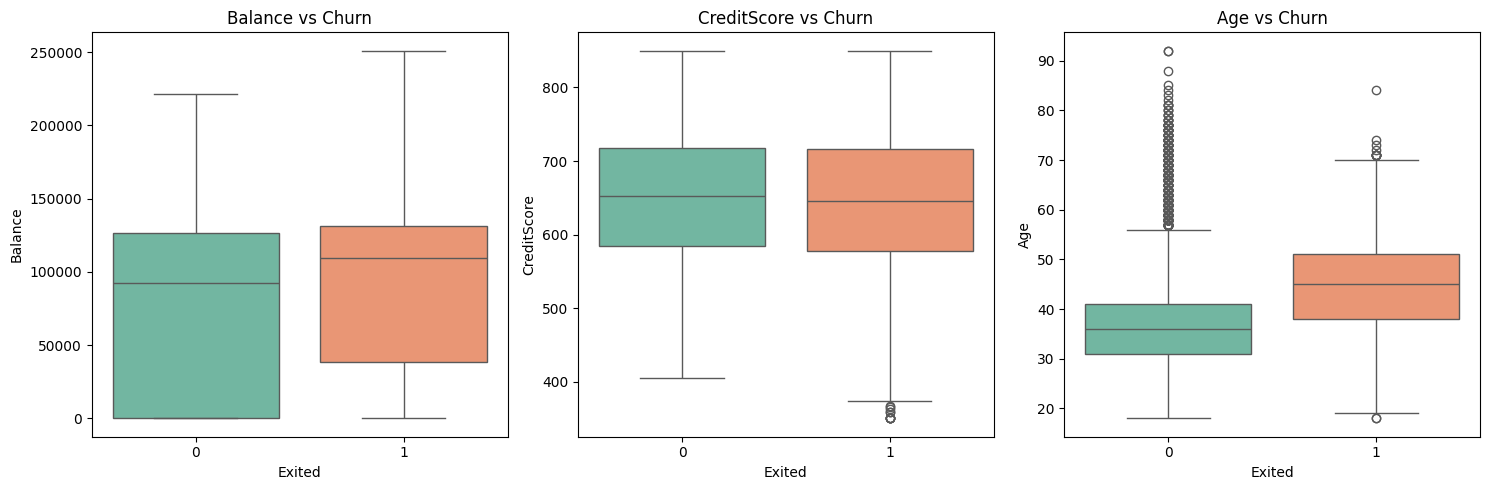

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# Balance
plt.subplot(1,3,1)
sns.boxplot(x='Exited', y='Balance', data=df, palette='Set2')
plt.title("Balance vs Churn")

# CreditScore
plt.subplot(1,3,2)
sns.boxplot(x='Exited', y='CreditScore', data=df, palette='Set2')
plt.title("CreditScore vs Churn")

# Age
plt.subplot(1,3,3)
sns.boxplot(x='Exited', y='Age', data=df, palette='Set2')
plt.title("Age vs Churn")

plt.tight_layout()
plt.show()

# Boxplots show median, quartiles, and outliers for churned vs retained customers.
# Outliers appear as points beyond the whiskers.
# By splitting on Exited, you can see whether churned customers have more extreme values in Balance, CreditScore, or Age.
# Example patterns (typical in churn datasets):
# Balance: Many customers with zero balance churn.
# CreditScore: Extremely low scores may be linked to churn.
# Age: Older customers (outliers above 60) often churn more.


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Analyst course\\CAPSTONE PROJECT\\CAPSTONE 1\\Customer-Churn-Records.csv")

# Define age brackets
bins = [18, 30, 50, 100]
labels = ['Adults (18-30)', 'Middle Age (30-50)', 'Seniors (50-100)']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Verify column creation
print(df[['Age','AgeGroup']].head())

# We reload the dataset and immediately add the AgeGroup column.
# This ensures the column exists in the DataFrame you’re working with.
# Checking with .head() confirms the new column is present


   Age            AgeGroup
0   42  Middle Age (30-50)
1   41  Middle Age (30-50)
2   42  Middle Age (30-50)
3   39  Middle Age (30-50)
4   43  Middle Age (30-50)


In [15]:
# Calculate churn rate per age group
age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100
print(age_churn)

# Now that AgeGroup exists, grouping works.
# Since Exited is binary (0/1), the mean = churn rate.
# Multiplying by 100 gives churn percentage for each age bracket.


AgeGroup
Adults (18-30)         7.556368
Middle Age (30-50)    18.380241
Seniors (50-100)      45.448029
Name: Exited, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\2940214238.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\1643874652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')


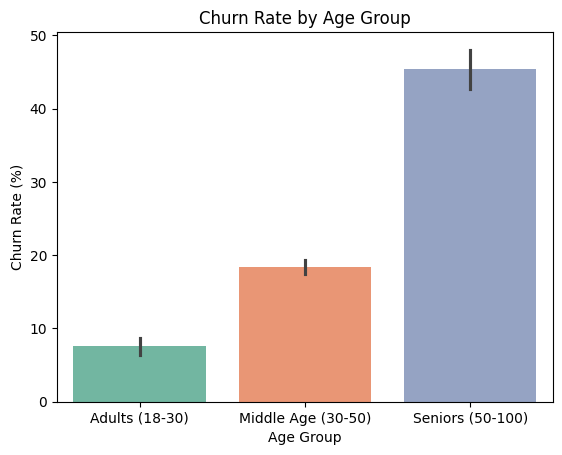

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='AgeGroup', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Age Group")
plt.show()

# The bar chart shows churn rates for Adults, Middle Age, and Seniors.
# Typically, churn is higher among middle‑aged and senior customers compared to younger adults.


In [12]:
# Calculate churn rate by number of products
product_churn = df.groupby('NumOfProducts')['Exited'].mean() * 100
print(product_churn)

# groupby('NumOfProducts')['Exited'].mean() → calculates churn rate for each product count.
# Since Exited is binary (0/1), the mean = churn percentage.
# Multiplying by 100 gives churn rate in %.
# This reveals whether customers with one product churn more than those with multiple.


NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21944\3811335101.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumOfProducts', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')


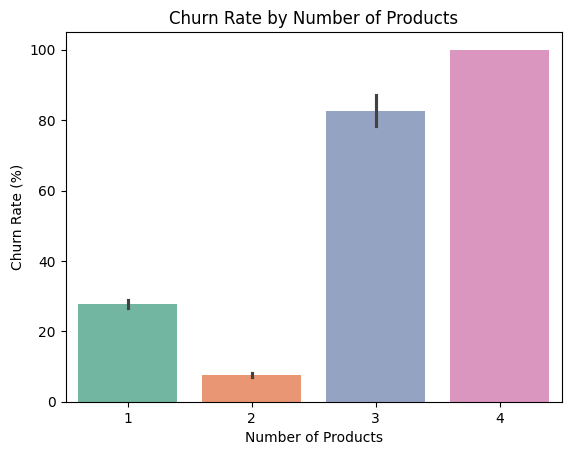

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='NumOfProducts', y='Exited', data=df, estimator=lambda x: 100*sum(x)/len(x), palette='Set2')
plt.title("Churn Rate by Number of Products")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Number of Products")
plt.show()

# The bar chart shows churn rates across product counts.
# Typically, churn datasets show higher churn among customers with only one product compared to those with multiple.
# Customers with more products are more “locked in” and less likely to leave.
